# NLP-Various Implementations | Tokenization using NLTK, SpaCy, and BERT

**Overview:** In this part of the project, I implemented three tokenization methods using NLTK's word_tokenize(), spaCy's en_core_web_sm model, and HuggingFace's BertTokenizer (bert-base-cased version). I analyzed a file containing short news texts from the Wall Street Journal. I then applied tokenization using these three different methods: nltk.word_tokenize(), en_core_web_sm English language model from spaCy, and BertTokenizer from HuggingFace. For each method, I reported the total number of tokens, the number of different tokens found, a random sentence with its token list, a table of the 20 most frequent tokens with their frequency, probability of appearance, and product of position times probability. I also analyzed the percentage of tokens that appear once, twice, and thrice and compare it to Zipf's Law. Finally, I find the best constant A that fits Zipf's Law for this set of texts and created a chart showing the predictions of Zipf's Law and the actual measurements.

## 1. Import all the necessary Modules

**Briefly:** ```nltk``` library provides tools for natural language processing, ```spacy``` library provides advanced natural language processing capabilities, whereas```transformers``` library provides access to pre-trained language models, including the popular BERT model. Additionally, ```numpy``` library is used for numerical operations and calculations, ```matplotlib``` library provides tools for visualizing data, including creating plots and graphs, ```collections``` library provides useful data structures like ```Counter``` for counting occurrences of items in a list. Finally, ```PrettyTable``` library provides a way to display data in a table format.

In [1]:
import nltk
import spacy
import transformers
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from prettytable import PrettyTable

## 2. Read the News Text from File

**Read the contents of wsj_untokenized.txt:** the function read() takes a file name as input and reads the contents of the file using the open() function in Python. The contents of the file are assigned to a variable named text. The with statement is used to ensure that the file is properly closed after its contents are read.

The code then calls the read() function and passes the name of the file to be read as an argument. The resulting text is assigned to a variable named text.

In [2]:
def read(file):
    with open(file, 'r') as f:
        text = f.read()
    return text
    
text = read('wsj_untokenized.txt')

## 3. Implement the Tokenization Methods

**Implement NLTK, SpaCy, and BERT tokenization methods:** This code defines three functions to tokenize a given text using different tokenizers, including NLTK, SpaCy, and BERT. Each function takes in a text and returns a list of tokens obtained from the respective tokenizer.

**3.1. Tokenize the text using NLTK:** the nltk_tokenize() function takes in a text argument and tokenizes it using the nltk.word_tokenize() function from the NLTK library.

* **Step.1:** the function takes in a text argument and tokenizes it using the word_tokenize() function from the NLTK library.
* **Step.2:** the resulting tokens are stored in a variable named "tokens" and returned by the function.

In [3]:
def nltk_tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

**3.2. Tokenize the text using SpaCy:** the spacy_tokenize() function tokenizes text using the SpaCy library, and returns a list of tokens extracted from the input text.

* **Step.1:** the spacy_tokenize() function loads the English tokenizer, tagger, parser and NER using the spacy.load() method.
* **Step.2:** the text input is passed to the tz() method, which returns a Doc object that contains the tokenized text.
* **Step.3:** the text input is then tokenized by iterating over each token in the Doc object and extracting the text for each token using the token.text attribute.
* **Step.4:** the function returns the resulting list of tokens.

In [4]:
def spacy_tokenize(text):
    tz = spacy.load('en_core_web_sm') # loads English tokenizer, tagger, parser and NER
    doc = tz(text)
    tokens = [token.text for token in doc]
    return tokens

**3.3. Tokenize the text using BERT:**: the bert_tokenize() function takes in a text argument and tokenizes it using the "tokenize()" function from the transformers library with the pre-trained bert-base-cased model.

* **Step.1:** the function loads the BertTokenizer with the pre-trained bert-base-cased model using the BertTokenizer.from_pretrained() method from the transformers library and stores it in a variable named "tz".
* **Step.2:** the tokenize() method of the BertTokenizer object "tz" is called with the input text as argument, and the resulting tokens are stored in a variable named "tokens".
* **Step.3:** the function returns the "tokens" variable, which contains the tokenized version of the input text.

In [5]:
def bert_tokenize(text):
    tz = transformers.BertTokenizer.from_pretrained('bert-base-cased') # loads the BertTokenizer with the bert-base-cased model
    tokens = tz.tokenize(text)
    return tokens

## 4. Tokenize the News Text

**Tokenize the text using NLTK, Spacy, and BERT tokenizers:** the tokenize() function tokenizes text using NLTK, Spacy, and BERT tokenizers, and displays the resulting tokens in a table format using the PrettyTable library.

* **Step.1:** the function takes in two arguments, text and display. The first one is the input text that needs to be tokenized, whereas the latter is a boolean value that determines whether the tokenization result will be displayed to the user or not.
* **Step.2:** it uses three tokenizers: nltk_tokenize() from the NLTK library, spacy_tokenize() from the Spacy library, and bert_tokenize() from the transformers library. These tokenizers are used to tokenize the input text and the resulting tokens are stored in nltk_tokens, spacy_tokens, and bert_tokens variables respectively.
* **Step.3:** the PrettyTable library is used to display the tokens in a table format with headers for each tokenizer type. If display is set to False, the table is not printed.
* **Step.4:** the function returns three variables, nltk_tokens, spacy_tokens, and bert_tokens which are the tokenized versions of the input text using each of the three tokenizers respectively.

The code assigns the three tokenized versions of the text to variables t1a, t2a, and t3a, using the tokenize() function with the "False" parameter to disable displaying the tokens in a table format.

In [6]:
def tokenize(text, display):
    
    nltk_tokens = nltk_tokenize(text)
    spacy_tokens = spacy_tokenize(text)
    bert_tokens = bert_tokenize(text)
    
    table = PrettyTable(field_names=[f"\033[1m{field}\033[0m" for field in ["NLTK", "SpaCy", "BERT"]])
    for i in range(max(map(len, [nltk_tokens, spacy_tokens, bert_tokens]))):
        table.add_row([t[i] if i < len(t) else '' for t in [nltk_tokens, spacy_tokens, bert_tokens]])
    print(table) if display else None

    return nltk_tokens, spacy_tokens, bert_tokens

t1a, t2a, t3a = tokenize(text, False)

## 5. Count the Tokens and Types

**Count the tokens and types produced from NLTK, Spacy, and BERT tokenization:** the "count()" function takes in three arguments, nltk_tokens, spacy_tokens, and bert_tokens, and counts the number of tokens and types (unique tokens) produced by each of the tokenizers.

* **Step.1:** the function creates a table using the PrettyTable library to display the token counts and types for each tokenizer.
* **Step.2:** the table is then populated with the token counts and types for each tokenizer using the len() and set() functions respectively.
* **Step.3:** the function aligns the table to the right and displays it to the user using the print() function.

The code assigns the tokenized versions of the text to variables t1a, t2a, and t3a, and then calls the count() function with these variables as arguments to count the tokens produced by each tokenizer.

In [7]:
def count(nltk_tokens, spacy_tokens, bert_tokens):
    table = PrettyTable(field_names=[f"\033[1m{field}\033[0m" for field in ["Method", "Tokens", "Types"]])
    table.add_rows([["NLTK", len(nltk_tokens), len(set(nltk_tokens))],
                    ["SpaCy", len(spacy_tokens), len(set(spacy_tokens))],
                    ["BERT", len(bert_tokens), len(set(bert_tokens))]])
    table.align = "r"
    print(table)
    
count(t1a, t2a, t3a)

+--------+--------+-------+
| Method | Tokens | Types |
+--------+--------+-------+
|   NLTK |  93530 | 12000 |
|  SpaCy |  95894 | 11477 |
|   BERT | 112325 | 10266 |
+--------+--------+-------+


Looking at the table, we can see that the BERT tokenizer has the largest number of tokens with 112,325, followed by SpaCy with 95,894 and NLTK with 93,530. However, when it comes to the number of types (unique tokens), we observe the exact opposite - NLTK has the largest number of types with 12,000, followed by SpaCy with 11,477, and BERT with only 10,266.

This suggests that the BERT tokenizer might be splitting the text into more pieces, including smaller and more infrequent words, while NLTK and SpaCy are more conservative in their tokenization approach, resulting in a higher number of types. Another possible explanation is that the BERT tokenizer is optimized for larger datasets and is more effective at capturing the nuances of language in larger contexts.

## 6. Tokenize a Random Sentence from the News Text

**Tokenize the sentence using NLTK, Spacy, and BERT tokenizers:** this code tokenizes a random input sentence using three different tokenizers: NLTK, SpaCy, and BERT. The tokenize() function is called with sentence as the input text and the boolean True as the display parameter, which instructs the function to display the tokenized output using a PrettyTable. The tokenized outputs are then returned and stored in the variables t1b, t2b, and t3b, which correspond to the NLTK, SpaCy, and BERT tokenized outputs, respectively.

In [8]:
sentence = " ''Cosby'' is down a full ratings point in the week of Oct. 2-8 over the same week a year ago, according to A.C. Nielsen Co. Mr. Gillespie at Viacom says the ratings are rising."
t1b, t2b, t3b = tokenize(sentence, True)

+-----------+-----------+-----------+
|    NLTK   |   SpaCy   |    BERT   |
+-----------+-----------+-----------+
|     ``    |           |     '     |
|   Cosby   |     ''    |     '     |
|     ''    |   Cosby   |     Co    |
|     is    |     ''    |   ##sby   |
|    down   |     is    |     '     |
|     a     |    down   |     '     |
|    full   |     a     |     is    |
|  ratings  |    full   |    down   |
|   point   |  ratings  |     a     |
|     in    |   point   |    full   |
|    the    |     in    |  ratings  |
|    week   |    the    |   point   |
|     of    |    week   |     in    |
|    Oct.   |     of    |    the    |
|    2-8    |    Oct.   |    week   |
|    over   |     2     |     of    |
|    the    |     -     |    Oct    |
|    same   |     8     |     .     |
|    week   |    over   |     2     |
|     a     |    the    |     -     |
|    year   |    same   |     8     |
|    ago    |    week   |    over   |
|     ,     |     a     |    the    |
| according 

**Observations:** Let us analyze and compare the performance of the three tokenizers provided in the table ...
* **Cosby:** NLTK and SpaCy both correctly tokenize "Cosby" as a single token. BERT splits "Cosby" into two subtokens, "Co" and "##sby", which is likely due to the way BERT's subword tokenization algorithm works. BERT's tokenizer tries to split words into subword units that are more common across the training corpus in order to improve efficiency and model performance. In this case, "Cosby" may not be a common enough word in BERT's training corpus to be recognized as a single token.
* **Oct. 2-8:** NLTK and SpaCy both recognize "Oct." as a single token while BERT splits it into two tokens, "Oct" and ".". This is likely because NLTK and SpaCy recognize "Oct." as an abbreviation for "October", while BERT treats it as two separate characters. Additionally, NLTK and SpaCy both split "2-8" into two tokens, while BERT splits it into three tokens: "2", "-" and "8". This is likely because NLTK and SpaCy recognize "2-8" as a single unit, representing a range of dates, while BERT treats the hyphen as a separate character.
* **Space character:** NLTK and BERT treated the initial space in the sentence as a punctuation mark and ignored it, while SpaCy recognized it as a separate token because it is the first character in the sentence and has a distinct grammatical function.

## 7. Design a Graph to visualize Tokenization Data

**Visualize tokenization data:** the graph() function takes in x and y data, as well as other arguments such as title, xlabel, ylabel, and labels, and creates a line graph using the plt.plot() function from the Matplotlib library.

* **Step 1:** the function takes in an x argument and one or more y arguments, as well as the title, xlabel, ylabel, and labels for the graph.
* **Step 2:** it then loops through each y argument and plots it using the plt.plot() function, with the corresponding label from the "labels" argument.
* **Step 3:** finally, it sets the graph title, xlabel, ylabel, and legend using the corresponding arguments and displays the graph using the plt.show() function.

In [9]:
def graph(x, *ys, title, xlabel, ylabel, labels):
    for i, y in enumerate(ys):
        plt.plot(x, y, label=labels[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

## 8. Perform Statistical Analysis on the Text

**8.1. Create the tokens frequency table:** the get_freq_table() function takes in a list of tokens as an argument and returns a frequency table for the tokens using the Counter() function from the collections module.

In [10]:
def get_freq_table(tokens):
    return Counter(tokens)

**8.2. Perform statistical analysis on the 20 top tokens of the tokenized text:** the get_statistics() function calculates and displays various statistics on the tokenized text, extracted using NLTK, Spacy, and BERT tokenization methods.

* **Step.1:** the function takes in three tokenized lists as arguments: "nltk_tokens", "spacy_tokens", and "bert_tokens".
* **Step.2:** it then calls the get_freq_table() function for each of the tokenized lists and stores the resulting frequency tables in variables named "nltk_freq", "spacy_freq", and "bert_freq", respectively.
* **Step.3:** the total number of tokens in each list is calculated and stored in variables named "nltk_total", "spacy_total", and "bert_total".
* **Step.4:** for each tokenized list, a PrettyTable is created with four columns: "Token", "Frequency", "Probability", and "Zipf Product".
* **Step.5:** for the top 20 tokens in each list, the probability and zipf product are calculated and added to the corresponding PrettyTable.
* **Step.6:** for each tokenized list, the function prints the name of the list and the corresponding PrettyTable.

The code calls the get_statistics() function and passes in three tokenized lists as arguments: "t1a", "t2a", and "t3a" to display these statistics.

In [11]:
def get_statistics(nltk_tokens, spacy_tokens, bert_tokens):
    
    nltk_freq = get_freq_table(nltk_tokens)
    spacy_freq = get_freq_table(spacy_tokens)
    bert_freq = get_freq_table(bert_tokens)
    
    nltk_total = len(nltk_tokens)
    spacy_total = len(spacy_tokens)
    bert_total = len(bert_tokens)
    
    table_nltk = PrettyTable(field_names=[f"\033[1m{field}\033[0m" for field in ["Token", "Frequency", "Probability", "Zipf Product"]])
    for j, (token, frequency) in enumerate(nltk_freq.most_common(20), start=1):
        prob = frequency / nltk_total
        prod = j * prob
        table_nltk.add_row([token, frequency, round(prob,5), round(prod,5)])
        
    table_spacy = PrettyTable(field_names=[f"\033[1m{field}\033[0m" for field in ["Token", "Frequency", "Probability", "Zipf Product"]])
    for j, (token, frequency) in enumerate(spacy_freq.most_common(20), start=1):
        prob = frequency / spacy_total
        prod = j * prob
        table_spacy.add_row([token, frequency, round(prob,5), round(prod,5)])
        
    table_bert = PrettyTable(field_names=[f"\033[1m{field}\033[0m" for field in ["Token", "Frequency", "Probability", "Zipf Product"]])
    for j, (token, frequency) in enumerate(bert_freq.most_common(20), start=1):
        prob = frequency / bert_total
        prod = j * prob
        table_bert.add_row([token, frequency, round(prob,5), round(prod,5)])

    for name, table in zip(["NLTK", "SpaCy", "BERT"], [table_nltk, table_spacy, table_bert]):
        print('\033[1m' + f"\n{name} Statistics:" + '\033[0m')
        print(table)
        
get_statistics(t1a, t2a, t3a)


NLTK Statistics:
+-------+-----------+-------------+--------------+
| Token | Frequency | Probability | Zipf Product |
+-------+-----------+-------------+--------------+
|   ,   |    4823   |   0.05157   |   0.05157    |
|  the  |    4041   |   0.04321   |   0.08641    |
|   .   |    3819   |   0.04083   |    0.1225    |
|   of  |    2312   |   0.02472   |   0.09888    |
|   to  |    2157   |   0.02306   |   0.11531    |
|   a   |    1857   |   0.01985   |   0.11913    |
|   in  |    1563   |   0.01671   |   0.11698    |
|  and  |    1489   |   0.01592   |   0.12736    |
|   ''  |    959    |   0.01025   |   0.09228    |
|   's  |    863    |   0.00923   |   0.09227    |
|  for  |    815    |   0.00871   |   0.09585    |
|  that |    807    |   0.00863   |   0.10354    |
|  The  |    714    |   0.00763   |   0.09924    |
|   $   |    708    |   0.00757   |   0.10598    |
|   is  |    671    |   0.00717   |   0.10761    |
|  said |    627    |    0.0067   |   0.10726    |
|   on  |    

## 9. Visualize Token Frequency Estimations

**9.1. Get the top-3 tokens frequencies:** the get_freq_values() function takes in a frequency table generated by the get_freq_table() function and returns the number of tokens that occur once, twice, and three times.

In [12]:
def get_freq_values(frequencies):
    return [len([token for token in frequencies.keys() if frequencies[token] == f]) for f in [1, 2, 3]]

**9.2. Estimate Zipf's law probability:** the zipf_estimate() function takes in a frequency value f as its input and returns an estimate of the probability of that frequency according to Zipf's Law. The formula used to calculate this probability is: $1/(f*(f+1))$.

In [13]:
def zipf_estimate(f):
    return 1/(f*(f+1))

**9.3. Visualize token frequency estimations:** the get_occurancies() function takes in three sets of token data (nltk_tokens, spacy_tokens, bert_tokens), calculates their respective token frequency tables, and calculates the percentage of tokens that appear once, twice, or three times in each set. The function then creates a PrettyTable object to display this information, as well as a line graph to compare the frequency estimations across the three sets and the Zipf distribution.

* **Step 1:** the function calculates the token frequency tables for each set of tokens using the get_freq_table() function.
* **Step 2:** it then calculates the percentage of tokens that appear once, twice, or three times in each set, and stores these values in nltk_y, spacy_y, and bert_y lists.
* **Step 3:** it also calculates the Zipf distribution for each frequency level and stores these values in the zipf_y list.
* **Step 4:** it creates a PrettyTable object to display the frequency estimations for each set of tokens, and prints the table.
* **Step 5:** it calls the graph() function to create a line graph with the x-axis values [1, 2, 3], and the y-axis values nltk_y, spacy_y, bert_y, and zipf_y, with corresponding labels "NLTK", "SpaCy", "BERT", and "Zipf". It also sets the graph title, xlabel, ylabel, and legend using the corresponding arguments.

The code calls the get_occurancies() function and passes in three tokenized lists as arguments: "t1a", "t2a", and "t3a" to display these estimations.

+--------+-------+--------+--------+
| Method | Once  | Twice  | Thrice |
+--------+-------+--------+--------+
| NLTK   | 6.69% | 1.96%  | 0.97%  |
| SpaCy  | 5.99% | 1.87%  | 0.92%  |
| BERT   | 3.43% | 1.53%  | 0.84%  |
| Zipf   | 50.0% | 16.67% | 8.33%  |
+--------+-------+--------+--------+


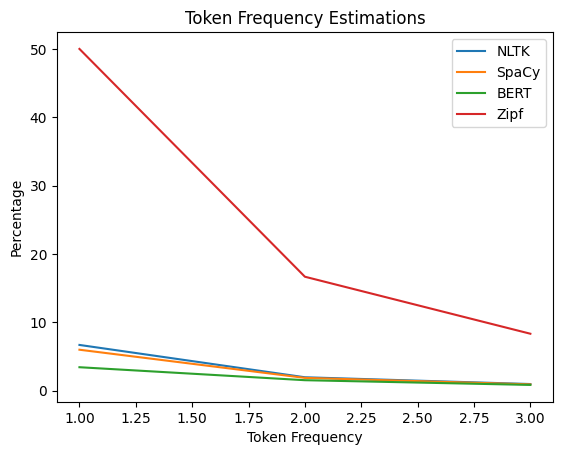

In [14]:
def get_occurancies(nltk_tokens, spacy_tokens, bert_tokens):
    
    nltk_freq = get_freq_table(nltk_tokens)
    spacy_freq = get_freq_table(spacy_tokens)
    bert_freq = get_freq_table(bert_tokens)

    nltk_once, nltk_twice, nltk_thrice = get_freq_values(nltk_freq)
    spacy_once, spacy_twice, spacy_thrice = get_freq_values(spacy_freq)
    bert_once, bert_twice, bert_thrice = get_freq_values(bert_freq)

    nltk_total = len(nltk_tokens)
    spacy_total = len(spacy_tokens)
    bert_total = len(bert_tokens)
    
    nltk_y = [round(nltk_once/nltk_total*100, 2), round(nltk_twice/nltk_total*100, 2), round(nltk_thrice/nltk_total*100, 2)]
    spacy_y = [round(spacy_once/spacy_total*100, 2), round(spacy_twice/spacy_total*100, 2), round(spacy_thrice/spacy_total*100, 2)]
    bert_y = [round(bert_once/bert_total*100, 2), round(bert_twice/bert_total*100, 2), round(bert_thrice/bert_total*100, 2)]
    zipf_y = [round(zipf_estimate(1)*100, 2), round(zipf_estimate(2)*100, 2), round(zipf_estimate(3)*100, 2)]
    
    table = PrettyTable(field_names=[f"\033[1m{'Method'}\033[0m", f"\033[1m{'Once'}\033[0m", f"\033[1m{'Twice'}\033[0m", f"\033[1m{'Thrice'}\033[0m"])
    table.add_rows([["NLTK", f"{nltk_y[0]}%", f"{nltk_y[1]}%", f"{nltk_y[2]}%"],
                    ["SpaCy", f"{spacy_y[0]}%", f"{spacy_y[1]}%", f"{spacy_y[2]}%"],
                    ["BERT", f"{bert_y[0]}%", f"{bert_y[1]}%", f"{bert_y[2]}%"],
                    ["Zipf", f"{zipf_y[0]}%", f"{zipf_y[1]}%", f"{zipf_y[2]}%"]])
    table.align = "l"
    print(table)
    graph([1, 2, 3], nltk_y, spacy_y, bert_y, zipf_y, title="Token Frequency Estimations", xlabel="Token Frequency", ylabel="Percentage", labels=["NLTK", "SpaCy", "BERT", "Zipf"])

get_occurancies(t1a, t2a, t3a)

## 10. Find the Optimal A-value of the Zipf Constant

**Find the optimal A-value of the Zipf constant for each tokenization method:** the find_optimal_A() function decides which is the optimal A-value for three different tokenization methods: NLTK, SpaCy, and BERT.

* **Step.1:** the function takes in three tokenized lists as arguments: "nltk_tokens", "spacy_tokens", and "bert_tokens".
* **Step.2:** it calls the get_freq_table() function for each of the tokenized lists and calculates the probability of each token by dividing its frequency by the total number of tokens in that list. These probabilities are stored in variables named "nltk_prob", "spacy_prob", and "bert_prob", respectively.
* **Step.3:** for each tokenization method, the function calculates the optimal A value by iterating over the sorted list of tokens and their probabilities, and calculating the sum of the product of each token's probability and its rank. This sum is divided by the total number of tokens to obtain the optimal A-value. The optimal A-values are stored in a dictionary named "A", with the keys "nltk", "spacy", and "bert".
* **Step.4:** a PrettyTable is created with two columns: "Method" and "Optimal A", and the optimal A-values for each tokenization method are added to the table.
* **Step.5:** the table is printed to the console and the dictionary "A" is returned.

The code calls the find_optimal_A() function and passes in three tokenized lists as arguments: "t1a", "t2a", and "t3a". The optimal A values for each method are stored in a dictionary named "alphas".

In [15]:
def find_optimal_A(nltk_tokens, spacy_tokens, bert_tokens):

    nltk_prob = {token: freq/len(nltk_tokens) for token, freq in get_freq_table(nltk_tokens).items()}
    spacy_prob = {token: freq/len(spacy_tokens) for token, freq in get_freq_table(spacy_tokens).items()}
    bert_prob = {token: freq/len(bert_tokens) for token, freq in get_freq_table(bert_tokens).items()}

    A = {}
    for method, prob_table in [('nltk', nltk_prob), ('spacy', spacy_prob), ('bert', bert_prob)]:
        product_sum = 0
        for rank, (token, prob) in enumerate(Counter(prob_table).most_common(), start=1):
            product_sum += prob * rank
        A[method] = product_sum / len(prob_table)
    table = PrettyTable(field_names=[f"\033[1m{'Method'}\033[0m", f"\033[1m{'Optimal A'}\033[0m"])
    table.add_rows([["NLTK", round(A['nltk'],7)], ["SpaCy", round(A['spacy'],7)], ["BERT", round(A['bert'],7)]])
    table.align = "l"
    print(table)
    return A

alphas = find_optimal_A(t1a, t2a, t3a)

+--------+-----------+
| Method | Optimal A |
+--------+-----------+
| NLTK   | 0.1034898 |
| SpaCy  | 0.1009775 |
| BERT   | 0.1006436 |
+--------+-----------+


## 11. Draw the Token Frequency Distributions

**Create a graph of the token frequency distributions for each method:** the draw_distribution() function takes in the optimal A-value for each tokenization method, as well as the tokenized lists for each method. It generates three graphs, one for each tokenization method, showing the log-log distribution of token frequencies and the Zipfian distribution.

* **Step.1:** the function takes in four arguments: "A", "nltk_tokens", "spacy_tokens", and "bert_tokens".
* **Step.2:** it calls the get_freq_table() function for each of the tokenized lists and calculates the frequency of each token. These frequencies are stored in variables named "nltk_freq", "spacy_freq", and "bert_freq", respectively.
* **Step.3:** for each tokenization method, the function generates two lists of x and y coordinates: one for the token frequencies and one for the Zipfian distribution. It does this by iterating over the sorted list of tokens and their frequencies, and calculating the Zipfian distribution using the optimal A-value for that method. These lists are stored in variables named "nltk_x", "nltk_y", "nltk_zipf", "spacy_x", "spacy_y", "spacy_zipf", "bert_x", "bert_y", and "bert_zipf", respectively.
* **Step.4:** for each tokenization method, the function generates a graph using the "graph()" function, passing in the x and y coordinates for the token frequencies and the Zipfian distribution, as well as a title, x-label, y-label, and legend labels. The graph for the NLTK tokenization method has the title "NLTK Token Frequency Distribution", the x-label "Token Rank", the y-label "Token Frequency", and legend labels "NLTK" and "Zipf". The same goes for the graphs of the SpaCy and BERT tokenization methods.

The code calls the draw_distribution() function and passes in the optimal A-value for each tokenization method, as well as the tokenized lists for each method: "alphas", "t1a", "t2a", and "t3a". The function generates three graphs, one for each tokenization method, showing the log-log distribution of token frequencies and the Zipfian distribution.

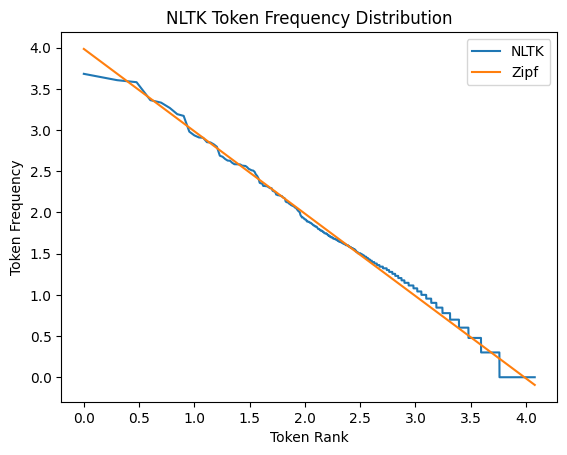

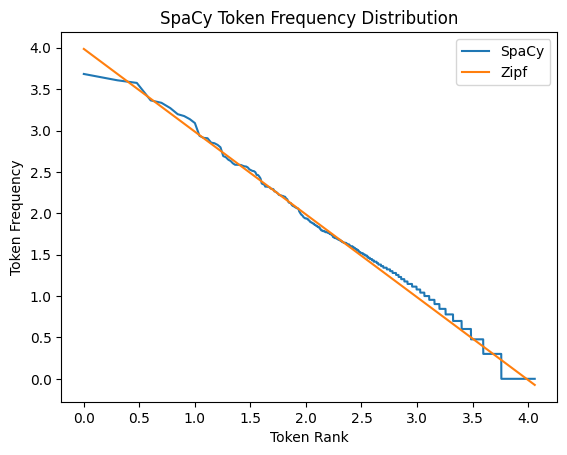

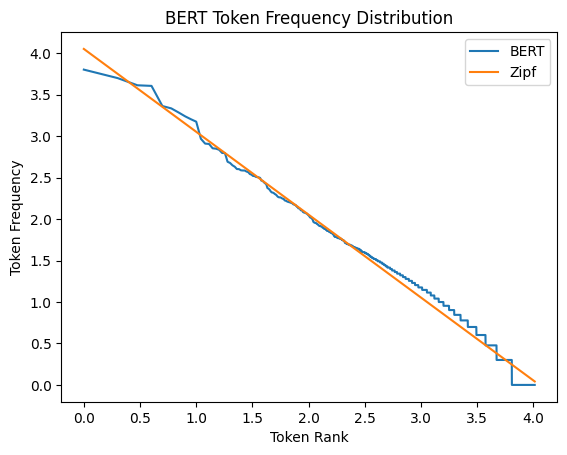

In [16]:
def draw_distribution(A, nltk_tokens, spacy_tokens, bert_tokens):
    
    nltk_freq = get_freq_table(nltk_tokens).most_common()
    spacy_freq = get_freq_table(spacy_tokens).most_common()
    bert_freq = get_freq_table(bert_tokens).most_common()
    
    nltk_x, nltk_y = zip(*enumerate([freq for token, freq in nltk_freq], start=1))
    spacy_x, spacy_y = zip(*enumerate([freq for token, freq in spacy_freq], start=1))
    bert_x, bert_y = zip(*enumerate([freq for token, freq in bert_freq], start=1))
    
    nltk_zipf = [A['nltk']*len(nltk_tokens)/rate for rate in nltk_x]
    spacy_zipf = [A['spacy']*len(spacy_tokens)/rate for rate in spacy_x]
    bert_zipf = [A['bert']*len(bert_tokens)/rate for rate in bert_x]
    
    graph(np.log10(nltk_x), np.log10(nltk_y), np.log10(nltk_zipf), title="NLTK Token Frequency Distribution", xlabel="Token Rank", ylabel="Token Frequency", labels=["NLTK", "Zipf"])
    graph(np.log10(spacy_x), np.log10(spacy_y), np.log10(spacy_zipf), title="SpaCy Token Frequency Distribution", xlabel="Token Rank", ylabel="Token Frequency", labels=["SpaCy", "Zipf"])
    graph(np.log10(bert_x), np.log10(bert_y), np.log10(bert_zipf), title="BERT Token Frequency Distribution", xlabel="Token Rank", ylabel="Token Frequency", labels=["BERT", "Zipf"])

draw_distribution(alphas, t1a, t2a, t3a)